In [1]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import os
import time

In [84]:
import factorAnalysisIOTools as IOTools

In [76]:
res_dir = "D:/HX_proj/factorAnalysis/res/00_factor_analysis_res_ma20"
factor_basename_list = os.listdir(res_dir)
factor_name_list = [x.split(".")[0] for x in factor_basename_list]
sp_name = "basic"
record_columns_list = [
    'long_exret_t5',
    'long_exret_t10',
    'long_exret_t15',
    'long_exret_t20',
    'long_reversal',
    'long_mom',
]
record_df = pd.DataFrame(index=factor_name_list,columns=record_columns_list)

In [77]:
a_res_save_dir

'D:/HX_proj/factorAnalysis/res/00_factor_analysis_res_ma20\\candle_up_over_down_varcoefMA20\\basic'

In [78]:
# a_factor_basename=factor_basename_list[0]
# a_factor_name=factor_name_list[0]
for a_factor_basename,a_factor_name in zip(factor_basename_list,factor_name_list):
    try:
        a_res_save_dir = os.path.join(res_dir,a_factor_name,sp_name)
        group_excess_return_eqW_th_dict = IOTools.load_res(a_res_save_dir,'04_group_excess_return_eqW_th_dict',to_datetime=True)
        group_IC_th_dict = IOTools.load_res(a_res_save_dir,'02_group_IC_th_dict',to_datetime=True)
        style_analysis_res_dict = IOTools.load_res(a_res_save_dir,'05_style_analysis_res_dict',to_datetime=True)
        style_analysis_res_mom = style_analysis_res_dict['RETURN_t20']
        style_analysis_res_reversal = style_analysis_res_dict['RETURN_t5']
        record_df.loc[a_factor_name,'long_exret_t5'] = round(group_excess_return_eqW_th_dict['RET_t5']['group10'].tail(500).mean()*250,4)
        record_df.loc[a_factor_name,'long_exret_t10'] = round(group_excess_return_eqW_th_dict['RET_t10']['group10'].tail(500).mean()*250,4)
        record_df.loc[a_factor_name,'long_exret_t15'] = round(group_excess_return_eqW_th_dict['RET_t15']['group10'].tail(500).mean()*250,4)
        record_df.loc[a_factor_name,'long_exret_t20'] = round(group_excess_return_eqW_th_dict['RET_t20']['group10'].tail(500).mean()*250,4)
        record_df.loc[a_factor_name,'long_reversal'] = round(style_analysis_res_reversal['group10'].tail(500).mean(),4)
        record_df.loc[a_factor_name,'long_mom'] = round(style_analysis_res_mom['group10'].tail(500).mean(),4)
    except:
        print(a_factor_name)

candle_up_over_down_varcoefMA20


In [80]:
record_df.to_excel("D:/HX_proj/factorAnalysis/res/record_20211020.xlsx")

In [8]:
IC_th_df = IOTools.load_res(a_res_save_dir,'02_IC_th_df',to_datetime=True)


,RET_t1,RET_t2,RET_t5,RET_t10,RET_t15,RET_t20
2017-01-03,0.141903,0.089487,0.012499,-0.062831,-0.062673,-0.018953
2017-01-04,0.029860,-0.044921,-0.054176,-0.099099,-0.093893,-0.036303
2017-01-05,-0.046869,-0.038643,-0.072987,-0.083702,-0.073277,-0.022510
2017-01-06,0.030170,0.074611,-0.140383,-0.066233,-0.054989,-0.016477
2017-01-09,0.061685,-0.072477,-0.154804,-0.105281,-0.054143,-0.028963
...,...,...,...,...,...,...
2021-05-10,-0.070370,0.038555,0.095521,0.123267,0.155646,0.143957
2021-05-11,0.041122,0.020721,0.113382,0.131992,0.146128,0.137276
2021-05-12,-0.032759,0.070201,0.128870,0.147417,0.135933,0.134682
2021-05-13,0.072895,0.078867,0.115512,0.145391,0.120406,0.109578


In [23]:
group_excess_return_eqW_th_dict = IOTools.load_res(a_res_save_dir,'04_group_excess_return_eqW_th_dict',to_datetime=True)
group_excess_return_eqW_t5 = group_excess_return_eqW_th_dict['RET_t5']

In [25]:
style_analysis_res_dict = IOTools.load_res(a_res_save_dir,'05_style_analysis_res_dict',to_datetime=True)
style_analysis_res_mom = style_analysis_res_dict['RETURN_t20']

In [27]:
style_analysis_res_mom.groupby(by=pd.Grouper(freq="1Y")).mean()

,group1,group2,group3,group4,group5,group6,group7,group8,group9,group10
2017-12-31,0.031112,0.004653,-0.004332,-0.004856,-0.000560,0.018548,0.003898,0.006595,-0.024650,-0.175357
2018-12-31,0.045679,0.029395,0.027673,0.017418,0.002243,0.014611,0.031251,0.014186,-0.053407,-0.238182
2019-12-31,0.007406,0.002427,0.004854,0.015941,0.023331,-0.000322,-0.018541,-0.047603,-0.076062,-0.215464
2020-12-31,-0.054574,-0.044554,-0.011131,0.005238,0.014981,0.026095,0.022735,-0.005756,-0.038797,-0.171182
2021-12-31,0.063008,0.037406,0.011359,-0.005897,0.028847,-0.028982,-0.039303,-0.061564,-0.122765,-0.200779


In [24]:
group_excess_return_eqW_t5.groupby(by=pd.Grouper(freq="1Y")).mean()*250

,group1,group2,group3,group4,group5,group6,group7,group8,group9,group10
2017-12-31,0.035189,0.038565,0.001164,0.013735,0.028887,0.028756,0.062180,0.000113,0.004567,-0.050817
2018-12-31,0.008695,0.075490,0.081727,0.057140,0.086375,0.073020,0.077474,0.032432,-0.005204,-0.108383
2019-12-31,-0.056250,-0.008573,0.040438,0.025199,0.037401,0.069929,0.062036,0.040855,-0.002626,-0.034367
2020-12-31,-0.046872,0.017511,-0.014279,0.048868,-0.005829,0.037502,0.046297,0.080278,-0.025432,-0.041591
2021-12-31,0.118292,0.077505,0.054569,0.012870,-0.000550,-0.007571,0.045389,-0.067741,-0.044629,-0.060082


# 超预期因子筛选股票池

In [2]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import os
import time
import factorAnalysisIOTools as IOTools

temp=scio.loadmat("E:/data/feature/FCT_GG_PNP_REVISION_3M.mat")

factor = IOTools.load_hx_feature("E:/data/feature/FCT_GG_PNP_REVISION_3M.mat")

factor

STOCK_POOL = pd.read_pickle("e:/data/interday/STOCK_POOL_basic.pkl")

STOCK_POOL

factor=factor.loc[20150000:]

factor

factor_60q = factor.quantile(q=0.7,axis=1)
factor_60q

filter_ = factor.sub(factor_60q,axis=0)>0
filter_.replace(False,np.nan,inplace=True)


filter_.sum(axis=1).loc[20170101:].describe()

filter_unstack = filter_.unstack().dropna().reset_index().set_axis(['code','date','filter'],axis=1)


filter_unstack

stock_pool_new = pd.merge(STOCK_POOL,filter_unstack,on=['code','date'],how='inner')

stock_pool_new.drop(columns=['filter']).to_pickle("e:data/interday/STOCK_POOL_fdmt.pkl")

stock_pool_new

from updateStockPool import update_benchmark_return

update_benchmark_return(stock_pool_new,stock_pool_name='STOCK_POOL_fdmt',benchmark_ret_save_dir = r"E:\data\interday")

In [45]:
bm_ret = IOTools.load_obj_pkl("E:/data/interday/BENCHMARK_RETURN_fdmt.pkl",to_datetime=True)
# bm_ret

In [44]:
bm_all_ret = IOTools.load_obj_pkl("E:/data/interday/BENCHMARK_RETURN_basic.pkl",to_datetime=True)
# bm_all_ret

In [46]:
bm_all_ret.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06'],
              dtype='datetime64[ns]', length=1607, freq=None)

In [47]:
bm_ret.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06'],
              dtype='datetime64[ns]', length=1607, freq=None)

In [48]:
bm = pd.merge(bm_all_ret,bm_ret,suffixes=("_all","_fdmt"),left_index=True,right_index=True)
bm

,RET_t1_all,RET_t2_all,RET_t5_all,RET_t10_all,RET_t15_all,RET_t20_all,RET_t1_fdmt,RET_t2_fdmt,RET_t5_fdmt,RET_t10_fdmt,RET_t15_fdmt,RET_t20_fdmt
2015-01-05,0.006848,0.008035,-0.001415,0.000593,0.004981,0.003037,0.012024,0.007758,-0.001018,-0.001074,0.004405,0.001619
2015-01-06,-0.001936,0.001069,-0.002503,0.002862,0.004608,0.003019,-0.002002,-0.001786,-0.001825,0.002515,0.003517,0.002114
2015-01-07,-0.000359,-0.000018,-0.002100,0.004352,0.003826,0.002885,-0.001716,0.001718,-0.000113,0.003750,0.002679,0.002176
2015-01-08,0.004113,-0.024885,0.000181,0.004477,0.003470,0.001771,0.008347,-0.018845,0.002830,0.003828,0.002466,0.000943
2015-01-09,-0.013325,0.008543,0.002262,0.008037,0.004272,0.002467,-0.005923,0.010541,0.000548,0.006263,0.002297,0.001845
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,0.002741,0.001469,NaN,NaN,NaN,NaN,-0.015859,0.010093,NaN,NaN,NaN,NaN
2021-08-03,0.006836,-0.000458,NaN,NaN,NaN,NaN,0.019690,0.003463,NaN,NaN,NaN,NaN
2021-08-04,-0.004748,-0.003788,NaN,NaN,NaN,NaN,-0.006701,0.005855,NaN,NaN,NaN,NaN
2021-08-05,-0.001568,NaN,NaN,NaN,NaN,NaN,0.006688,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

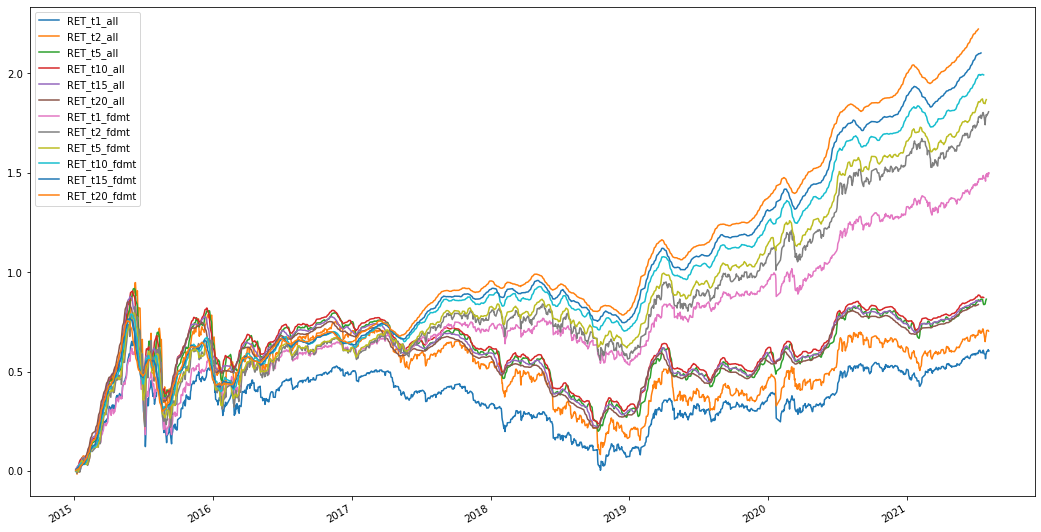

In [49]:
bm.cumsum().plot(figsize=(18,10))

In [54]:
bm_fdmt_minus_all = bm_ret-bm_all_ret

<AxesSubplot:>

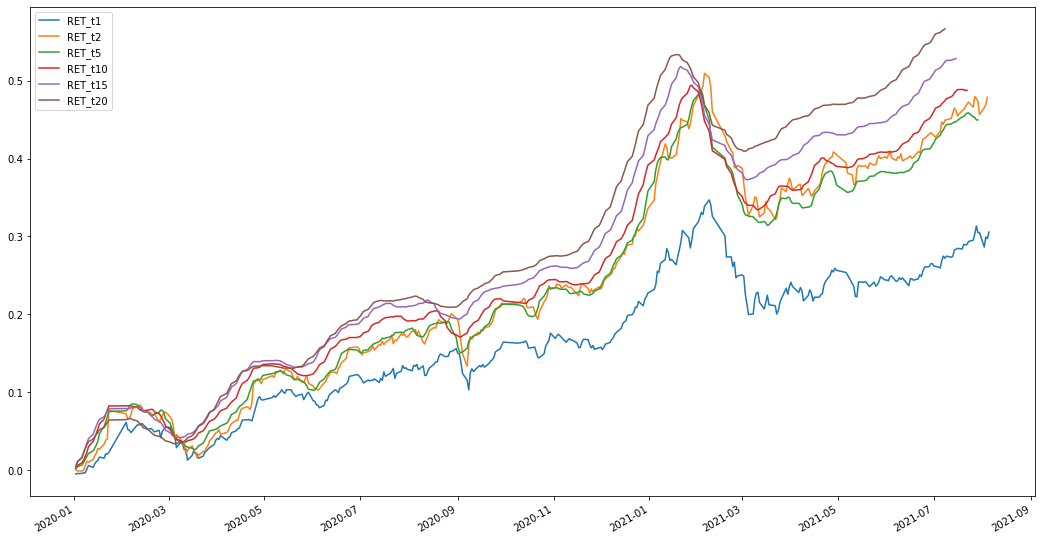

In [56]:
bm_fdmt_minus_all.loc['20200101':].cumsum().plot(figsize=(18,10))

# 观察持仓变化

In [28]:
res_dir = r"D:\HX_proj\factorAnalysis\res\00_factor_analysis_res_fdmt\act_net_norm_open_l2MA20\fdmt"
position = IOTools.load_res(res_dir,'11_long_group_weight_eqW_df',to_datetime=True)

In [30]:
position

,600373.SH,300557.SZ,000416.SZ,002156.SZ,600500.SH,002123.SZ,000610.SZ,601699.SH,603336.SH,000663.SZ,...,688285.SH,688711.SH,688187.SH,688737.SH,688697.SH,688707.SH,688272.SH,688121.SH,601728.SH,601868.SH
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
position.sum().sort_values(ascending=False)

603799.SH    5.779554
300347.SZ    5.673640
601100.SH    4.885371
000338.SZ    4.092407
603806.SH    3.916328
               ...   
300204.SZ    0.000000
002989.SZ    0.000000
600906.SH    0.000000
300977.SZ    0.000000
300941.SZ    0.000000
Length: 4572, dtype: float64

In [32]:
position = position.dropna(how='all',axis=1)

In [33]:
turnover = abs(position.fillna(0).diff()).sum(axis=1)
turnover

2017-01-03    0.000000
2017-01-04    0.493506
2017-01-05    0.441558
2017-01-06    0.487179
2017-01-09    0.615385
                ...   
2021-10-20    1.000000
2021-10-21    0.000000
2021-10-22    0.000000
2021-10-25    0.000000
2021-10-26    0.000000
Length: 1169, dtype: float64

In [34]:
turnover_stock_noabs = (position.fillna(0).diff())

In [35]:
turnover_stock = abs(position.fillna(0).diff())
turnover_stock.mean().sort_values(ascending=False)

603799.SH    0.001670
300347.SZ    0.001645
601100.SH    0.001234
000338.SZ    0.001195
600570.SH    0.001187
               ...   
300861.SZ    0.000020
002712.SZ    0.000019
600737.SH    0.000012
600310.SH    0.000012
600240.SH    0.000011
Length: 1533, dtype: float64

In [36]:
turnover_stock.loc['2021-04-01':].mean().sort_values(ascending=False)

000933.SZ    0.003416
300458.SZ    0.002960
002240.SZ    0.002879
000799.SZ    0.002782
000733.SZ    0.002766
               ...   
601599.SH    0.000000
000961.SZ    0.000000
300228.SZ    0.000000
300224.SZ    0.000000
600373.SH    0.000000
Length: 1533, dtype: float64

In [38]:
position_000933 = position['000933.SZ']
position_000933.tail(40)

2021-08-23          NaN
2021-08-24          NaN
2021-08-25    0.0169492
2021-08-26     0.015873
2021-08-27     0.015625
2021-08-30    0.0140845
2021-08-31    0.0136986
2021-09-01          NaN
2021-09-02     0.012987
2021-09-03       0.0125
2021-09-06    0.0123457
2021-09-07    0.0126582
2021-09-08          NaN
2021-09-09    0.0121951
2021-09-10    0.0120482
2021-09-13          NaN
2021-09-14    0.0120482
2021-09-15    0.0123457
2021-09-16    0.0120482
2021-09-17    0.0119048
2021-09-22    0.0119048
2021-09-23          NaN
2021-09-24          NaN
2021-09-27          NaN
2021-09-28    0.0119048
2021-09-29          NaN
2021-09-30    0.0119048
2021-10-08    0.0116279
2021-10-11    0.0114943
2021-10-12    0.0114943
2021-10-13          NaN
2021-10-14          NaN
2021-10-15          NaN
2021-10-18          NaN
2021-10-19          NaN
2021-10-20          NaN
2021-10-21          NaN
2021-10-22          NaN
2021-10-25          NaN
2021-10-26          NaN
Name: 000933.SZ, dtype: object

In [40]:
position_300458 = position['300458.SZ']
position_300458.loc['2021-04-01':].tail(40)

2021-08-23          NaN
2021-08-24          NaN
2021-08-25          NaN
2021-08-26     0.015873
2021-08-27     0.015625
2021-08-30          NaN
2021-08-31          NaN
2021-09-01    0.0136986
2021-09-02     0.012987
2021-09-03       0.0125
2021-09-06    0.0123457
2021-09-07    0.0126582
2021-09-08    0.0123457
2021-09-09          NaN
2021-09-10    0.0120482
2021-09-13    0.0121951
2021-09-14    0.0120482
2021-09-15    0.0123457
2021-09-16    0.0120482
2021-09-17    0.0119048
2021-09-22    0.0119048
2021-09-23    0.0119048
2021-09-24          NaN
2021-09-27    0.0128205
2021-09-28    0.0119048
2021-09-29          NaN
2021-09-30    0.0119048
2021-10-08          NaN
2021-10-11          NaN
2021-10-12          NaN
2021-10-13          NaN
2021-10-14          NaN
2021-10-15          NaN
2021-10-18          NaN
2021-10-19          NaN
2021-10-20          NaN
2021-10-21          NaN
2021-10-22          NaN
2021-10-25          NaN
2021-10-26          NaN
Name: 300458.SZ, dtype: object

In [87]:
turnover_000933 = turnover_stock['000933.SZ']
turnover_000933

2017-01-03         NaN
2017-01-04    0.000000
2017-01-05    0.000000
2017-01-06    0.000000
2017-01-09    0.000000
                ...   
2021-05-10    0.012821
2021-05-11    0.012195
2021-05-12    0.000147
2021-05-13    0.000000
2021-05-14    0.000000
Name: 000933.SZ, Length: 1060, dtype: float64

In [80]:
turnover_603799.sort_values(ascending=False).head(40)

2021-02-18    0.021739
2021-03-08    0.021739
2021-02-25    0.021739
2018-02-23    0.021277
2017-02-14    0.021277
2021-02-24    0.021277
2021-02-19    0.021277
2019-08-12    0.021277
2017-02-10    0.021277
2019-08-09    0.021277
2018-03-06    0.020833
2017-02-23    0.020833
2021-03-16    0.020833
2017-02-22    0.020833
2021-03-03    0.020833
2018-02-12    0.020833
2021-03-10    0.020833
2021-03-15    0.020833
2021-03-12    0.020408
2018-03-07    0.020408
2021-03-17    0.020408
2018-02-13    0.020408
2017-02-17    0.020408
2021-03-11    0.020408
2018-03-12    0.020408
2018-02-22    0.020408
2017-02-24    0.020000
2017-02-21    0.020000
2021-02-02    0.019608
2021-02-03    0.019608
2021-02-01    0.019608
2017-03-07    0.019231
2017-08-02    0.018519
2017-08-14    0.018182
2017-03-20    0.018182
2017-07-28    0.018182
2021-01-29    0.016949
2021-01-28    0.016949
2017-08-18    0.016667
2018-08-24    0.016393
Name: 603799.SH, dtype: float64

In [76]:
position_603799.

count     341.000000
unique     47.000000
top         0.013889
freq       22.000000
Name: 603799.SH, dtype: float64

# position 2 return

In [79]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import os
import time
import factorAnalysisIOTools as IOTools
import factorAnalysisCalTools as CalTools

In [98]:
time_horizon_dict = {
    'RET_t1':1,
    'RET_t2':1,
    'RET_t5':5,
    'RET_t10':10,
    'RET_t15':15,
    'RET_t20':20,
    }

In [52]:
sp_basic = IOTools.load_obj_pkl("E:\data\interday/STOCK_POOL_basic.pkl")

In [54]:
sp_basic = sp_basic[sp_basic.date>20170101]

In [77]:
sp_basic.to_pickle("E:\data\interday/STOCK_POOL_basic_2017.pkl")

In [78]:
bm_basic = IOTools.load_obj_pkl("E:/data/interday/BENCHMARK_RETURN_basic.pkl")

In [61]:
res_dir = r"D:\HX_proj\factorAnalysis\res\00_factor_analysis_res_fdmt\act_net_norm_open_l2MA20\fdmt"
position = IOTools.load_res(res_dir,'11_long_group_weight_eqW_df')

In [81]:
adjvwap = sp_basic.pivot(index='date',columns='code',values='ADJVWAP')
adjclose = sp_basic.pivot(index='date',columns='code',values='ADJCLOSE')

In [82]:
RET_dict = CalTools.prepare_RET_dict(adjvwap,adjclose)

In [84]:
position =position.reindex_like(adjvwap)

In [99]:
temp=[]

for tn,ret_tn in RET_dict.items():
    temp.append((position*ret_tn).sum(axis=1).rename(tn)/time_horizon_dict[tn])
position_retTH_df=pd.DataFrame(temp).T
position_retTH_df

,RET_t1,RET_t2,RET_t5,RET_t10,RET_t15,RET_t20
date,,,,,,
20170103,0.006633,0.003381,-0.001334,-0.004358,-0.001546,-0.000352
20170104,-0.002633,-0.004730,-0.003184,-0.005119,-0.001232,0.000176
20170105,-0.002597,0.001111,-0.005388,-0.004206,-0.001727,0.000347
20170106,0.006319,0.000929,-0.010978,-0.003514,-0.001589,0.000588
20170109,-0.000647,-0.006298,-0.012130,-0.003366,-0.001140,0.000378
...,...,...,...,...,...,...
20211020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20211021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20211022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [100]:
position_retTH_df.describe()

,RET_t1,RET_t2,RET_t5,RET_t10,RET_t15,RET_t20
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000
mean,0.000912,0.001249,0.001209,0.001123,0.001129,0.001160
std,0.010055,0.012484,0.006142,0.004293,0.003604,0.003186
min,-0.052527,-0.097120,-0.020908,-0.015412,-0.011026,-0.007613
25%,-0.004397,-0.005356,-0.002574,-0.001279,-0.000896,-0.000932
50%,0.000788,0.001564,0.001671,0.001253,0.001174,0.001183
75%,0.006597,0.008612,0.005256,0.003823,0.003440,0.003048
max,0.042573,0.062796,0.022457,0.017420,0.015808,0.013245


In [96]:
position_excess_retTH.describe()

,RET_t1,RET_t2,RET_t5,RET_t10,RET_t15,RET_t20
count,1168.000000,1167.000000,1163.000000,1158.000000,1153.000000,1148.000000
mean,0.000799,0.001224,0.005952,0.011191,0.017007,0.023448
std,0.006577,0.007198,0.025869,0.039682,0.051590,0.061824
min,-0.035204,-0.049670,-0.090190,-0.143657,-0.166254,-0.155914
25%,-0.002555,-0.002766,-0.010133,-0.011761,-0.012282,-0.017912
50%,0.000746,0.001225,0.008415,0.012629,0.018213,0.024103
75%,0.003829,0.004924,0.022677,0.036208,0.050113,0.060496
max,0.049393,0.051054,0.098592,0.156925,0.225694,0.254473


<AxesSubplot:>

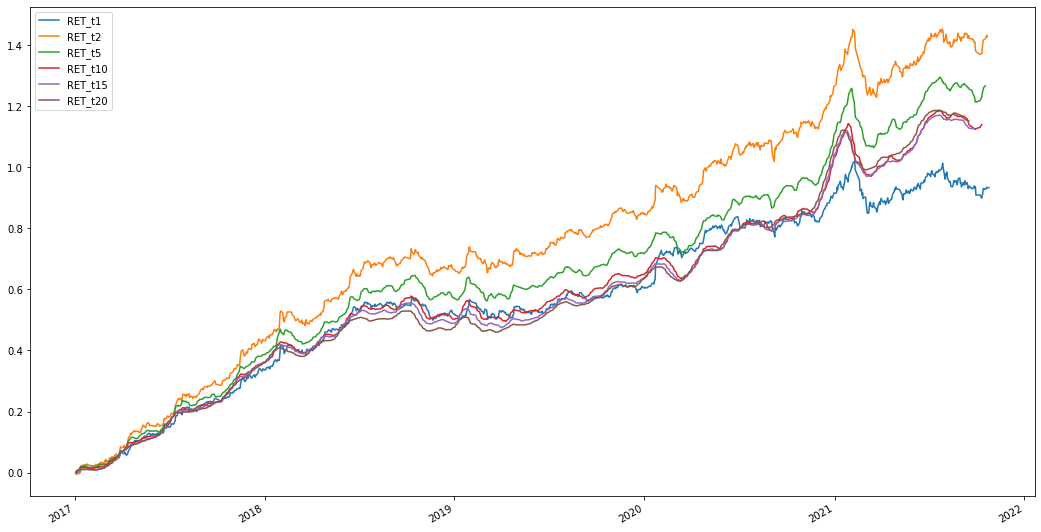

In [101]:
position_excess_retTH = position_retTH_df-bm_basic.reindex_like(position_retTH_df)
position_excess_retTH.index = pd.to_datetime([str(x) for x in position_excess_retTH.index])
position_excess_retTH.cumsum().plot(figsize=(18,10))

<AxesSubplot:>

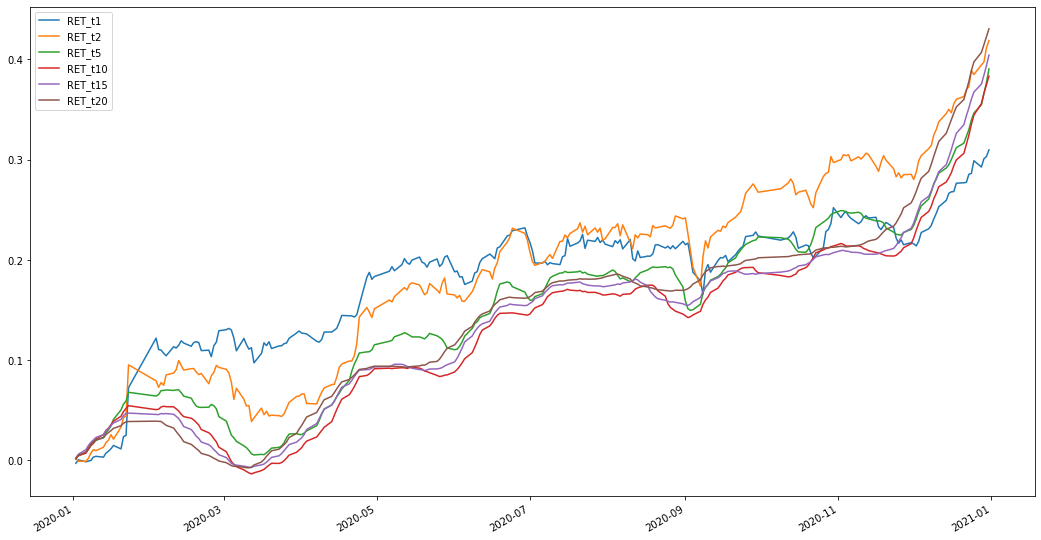

In [102]:
position_excess_retTH.loc['2020'].cumsum().plot(figsize=(18,10))

In [75]:
ret_position_se = (ret_t2*position_select).sum(axis=1)

<AxesSubplot:>

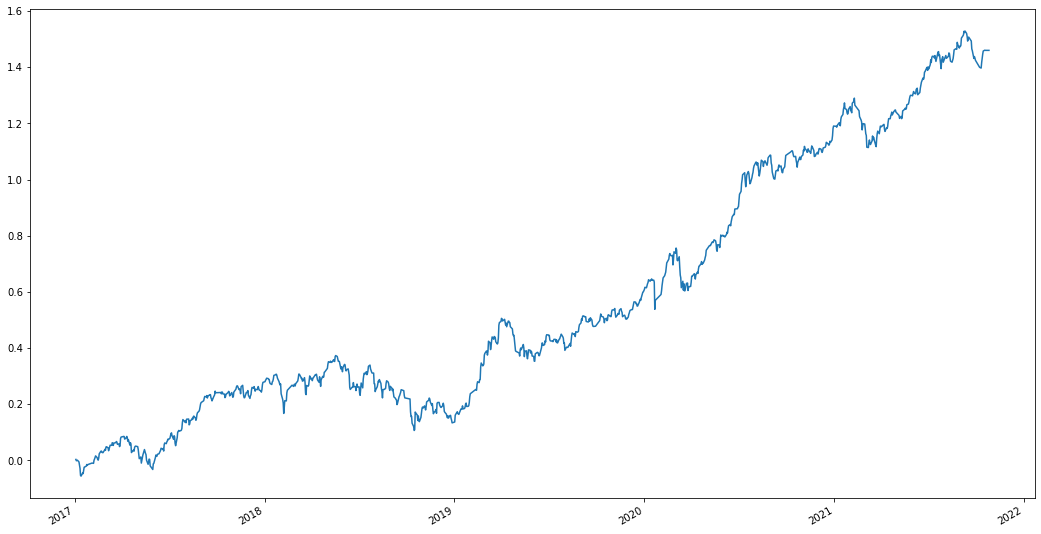

In [76]:
ret_position_se.index = pd.to_datetime([str(x) for x in ret_position_se.index])
ret_position_se.cumsum().plot(figsize=(18,10))

# 2021-11-02
- 基本面30%股票池内周度增强TOP，1/3，考虑手续费
- 基本面30%+技术面10% 交集，周度考虑手续费
- 得到fdmt_enhance_position
- **对比bm_fdmt**有无增强

## 基本面30%股票池 top3增强 txfee=0.0015 单边

In [2]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import os
import time
import sys
os.chdir("D:/HX_proj/factorAnalysis")
import factorAnalysisIOTools as IOTools
import factorAnalysisCalTools as CalTools

fdmt_enhance_res_dir = r"D:\HX_proj\factorAnalysis\res\00_factor_analysis_res_fdmt\act_net_norm_open_l2MA20\fdmt"
fdmt_enhance_position = IOTools.load_res(fdmt_enhance_res_dir,'11_long_group_weight_eqW_df')

technical_res_dir = r"D:\HX_proj\factorAnalysis\res\00_factor_analysis_res\act_net_norm_open_l2MA20\basic"
technical_position = IOTools.load_res(technical_res_dir,'11_long_group_weight_eqW_df')

In [3]:
time_horizon_dict = {
    'RET_t1':1,
    'RET_t2':1,
    'RET_t5':5,
    'RET_t10':10,
    'RET_t15':15,
    'RET_t20':20,
    }
sp_basic = IOTools.load_obj_pkl("E:/data/interday/STOCK_POOL_basic.pkl")
sp_basic = sp_basic[sp_basic.date>20170000]
bm_basic = IOTools.load_obj_pkl("E:/data/interday/BENCHMARK_RETURN_basic.pkl")
bm_fdmt= IOTools.load_obj_pkl("E:/data/interday/BENCHMARK_RETURN_fdmt.pkl")
adjvwap = sp_basic.pivot(index='date',columns='code',values='ADJVWAP')
adjclose = sp_basic.pivot(index='date',columns='code',values='ADJCLOSE')
RET_dict = CalTools.prepare_RET_dict(adjvwap,adjclose)
fdmt_enhance_position =fdmt_enhance_position.reindex_like(adjvwap)

In [28]:
sp_fdmt = IOTools.load_obj_pkl("E:/data/interday/STOCK_POOL_fdmt.pkl")
fdmt_bm_position = sp_fdmt.pivot(index='date',columns='code',values='ZX_1').reindex_like(adjvwap)
fdmt_bm_position[fdmt_bm_position>0] = 1
fdmt_bm_position_sum = fdmt_bm_position.sum(axis=1)

fdmt_bm_position = fdmt_bm_position.div(fdmt_bm_position_sum,axis=0)

In [13]:
def cal_turnover(position_df,time_horizon=1):
    turnover_df = abs(position_df.shift(-time_horizon).fillna(0)-position_df.fillna(0))
    return turnover_df.sum(axis=1),turnover_df

In [56]:
def cal_daily_return_txfee(position,time_horizon_str="RET_t5",tx_fee=0.0015):
    ret_tn = RET_dict[time_horizon_str]
    time_horizon_num = time_horizon_dict[time_horizon_str]
    turnover_df = abs(position.shift(-time_horizon_num).fillna(0)-position.fillna(0))
    turnover_se = turnover_df.sum(axis=1)
    ret_se = ((ret_tn*position).sum(axis=1)-turnover_se*tx_fee)/time_horizon_num
    ret_se.index = pd.to_datetime([str(x) for x in ret_se.index])
    return turnover_se,ret_se

### style analysis

In [ ]:
sp_basic

### RET_t2 with txfee

In [69]:
fdmt_enhance_ret_t2_turnover,fdmt_enhance_ret_t2_txfee=cal_daily_return_txfee(fdmt_enhance_position,time_horizon_str="RET_t2")
fdmt_bm_ret_t2_turnover,fdmt_bm_ret_t2_txfee=cal_daily_return_txfee(fdmt_bm_position,time_horizon_str="RET_t2")
print("fdmt_enhance_ret_t2_turnover.describe():\n",fdmt_enhance_ret_t2_turnover.describe())
print("fdmt_bm_ret_t2_turnover.describe():\n",fdmt_bm_ret_t2_turnover.describe())

fdmt_enhance_ret_t2_turnover.describe():
 count    1169.000000
mean        0.404082
std         0.126400
min         0.000000
25%         0.326531
50%         0.394737
75%         0.463768
max         1.756098
dtype: float64
fdmt_bm_ret_t2_turnover.describe():
 count    1169.000000
mean        0.122995
std         0.079894
min         0.000000
25%         0.074534
50%         0.109589
75%         0.151260
max         1.005128
dtype: float64


<AxesSubplot:title={'center':'fdmt enhance vs bm RET_t2'}>

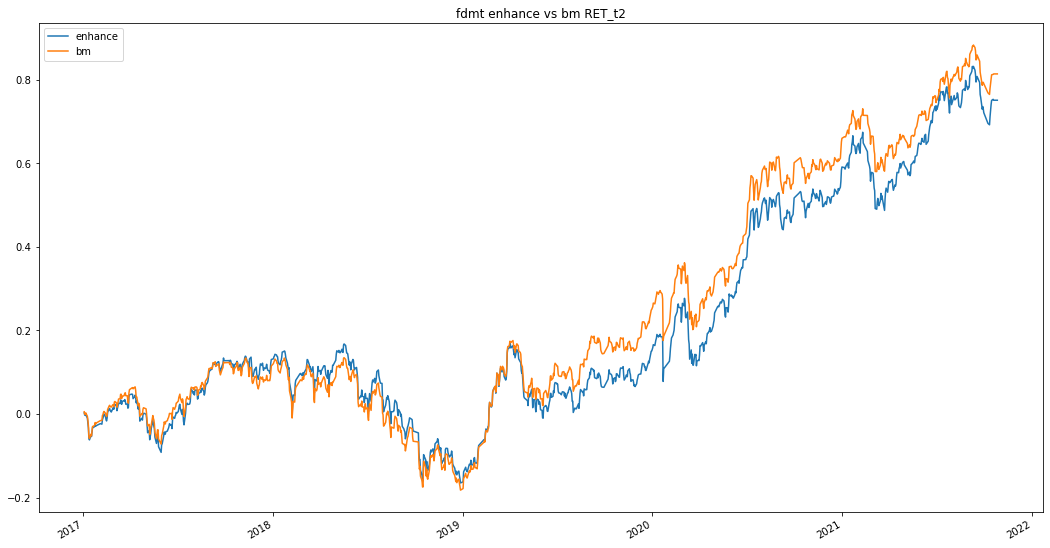

In [62]:
fdmt_compare_ret_t2_txfee = pd.concat([fdmt_enhance_ret_t2_txfee.rename("enhance"),fdmt_bm_ret_t2_txfee.rename("bm")],axis=1)
fdmt_compare_ret_t2_txfee.cumsum().plot(figsize=(18,10),title="fdmt enhance vs bm RET_t2")

<AxesSubplot:title={'center':'enhance excess bm RET_t2'}>

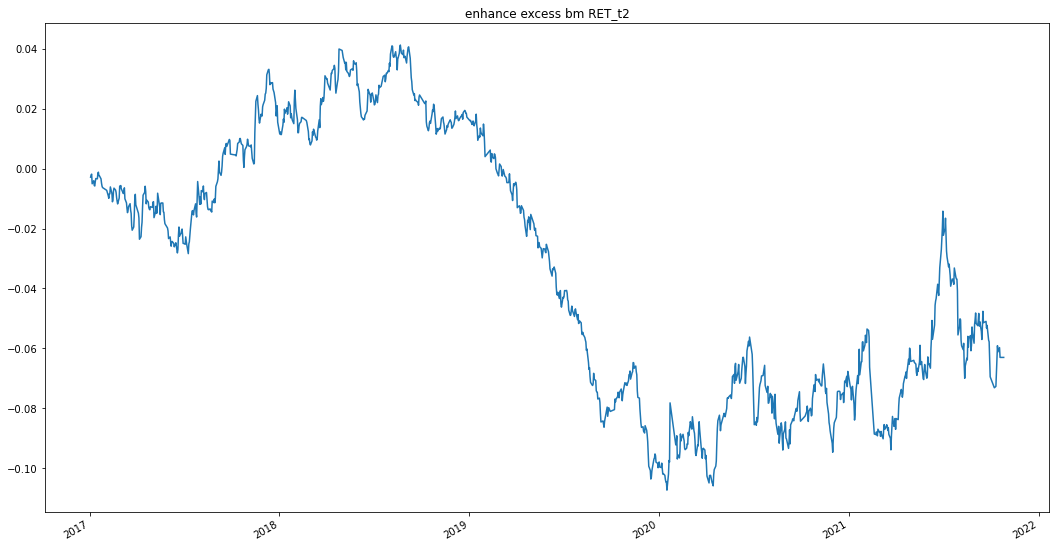

In [64]:
(fdmt_enhance_ret_t2_txfee-fdmt_bm_ret_t2_txfee).cumsum().plot(figsize=(18,10),title="enhance excess bm RET_t2")

### RET_t5 with txfee

In [68]:
fdmt_enhance_ret_t5_turnover,fdmt_enhance_ret_t5_txfee=cal_daily_return_txfee(fdmt_enhance_position)

fdmt_bm_ret_t5_turnover,fdmt_bm_ret_t5_txfee=cal_daily_return_txfee(fdmt_bm_position)
print("fdmt_enhance_ret_t5_turnover.describe():\n",fdmt_enhance_ret_t5_turnover.describe())
print("fdmt_bm_ret_t5_turnover.describe():\n",fdmt_bm_ret_t5_turnover.describe())

fdmt_enhance_ret_t5_turnover.describe():
 count    1169.000000
mean        0.879015
std         0.173445
min         0.000000
25%         0.773333
50%         0.872727
75%         0.972222
max         1.869565
dtype: float64
fdmt_bm_ret_t5_turnover.describe():
 count    1169.000000
mean        0.397993
std         0.165301
min         0.000000
25%         0.288066
50%         0.370861
75%         0.473430
max         1.162393
dtype: float64


<AxesSubplot:title={'center':'fdmt enhance vs bm'}>

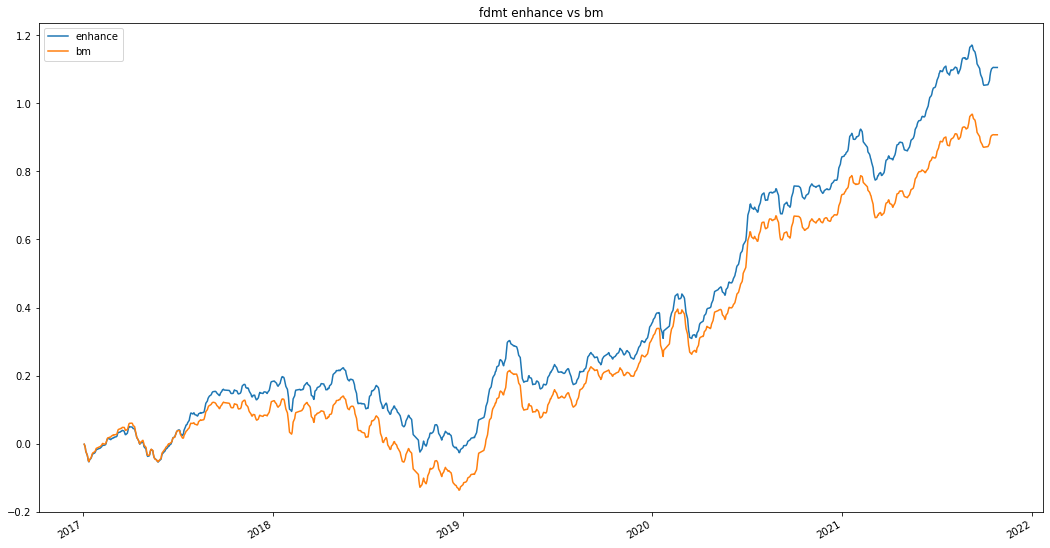

In [65]:
fdmt_compare_ret_t5_txfee = pd.concat([fdmt_enhance_ret_t5_txfee.rename("enhance"),fdmt_bm_ret_t5_txfee.rename("bm")],axis=1)
fdmt_compare_ret_t5_txfee.cumsum().plot(figsize=(18,10),title="fdmt enhance vs bm")

<AxesSubplot:title={'center':'enhance excess bm'}>

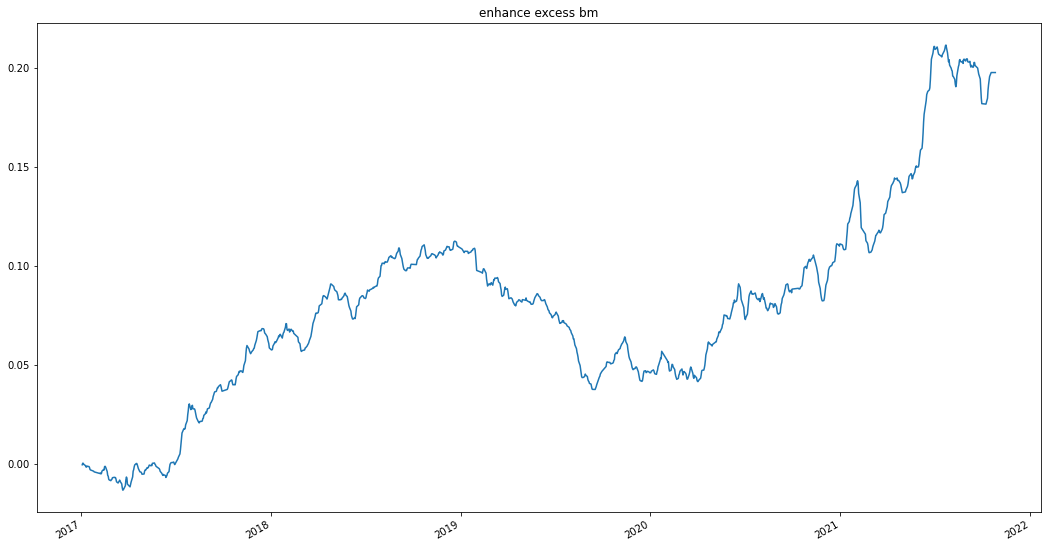

In [66]:
(fdmt_enhance_ret_t5_txfee-fdmt_bm_ret_t5_txfee).cumsum().plot(figsize=(18,10),title="enhance excess bm")

### RET_t10 with txfee

In [70]:
fdmt_enhance_ret_t10_turnover,fdmt_enhance_ret_t10_txfee=cal_daily_return_txfee(fdmt_enhance_position,time_horizon_str="RET_t10")
fdmt_bm_ret_t10_turnover,fdmt_bm_ret_t10_txfee=cal_daily_return_txfee(fdmt_bm_position,time_horizon_str="RET_t10")
print("fdmt_enhance_ret_t10_turnover.describe():\n",fdmt_enhance_ret_t10_turnover.describe())
print("fdmt_bm_ret_t10_turnover.describe():\n",fdmt_bm_ret_t10_turnover.describe())

fdmt_enhance_ret_t10_turnover.describe():
 count    1169.000000
mean        1.180119
std         0.183831
min         0.000000
25%         1.076923
50%         1.181818
75%         1.287671
max         1.884058
dtype: float64
fdmt_bm_ret_t10_turnover.describe():
 count    1169.000000
mean        0.599801
std         0.211652
min         0.000000
25%         0.444444
50%         0.589744
75%         0.704348
max         1.278970
dtype: float64


<AxesSubplot:title={'center':'fdmt enhance vs bm RET_t10'}>

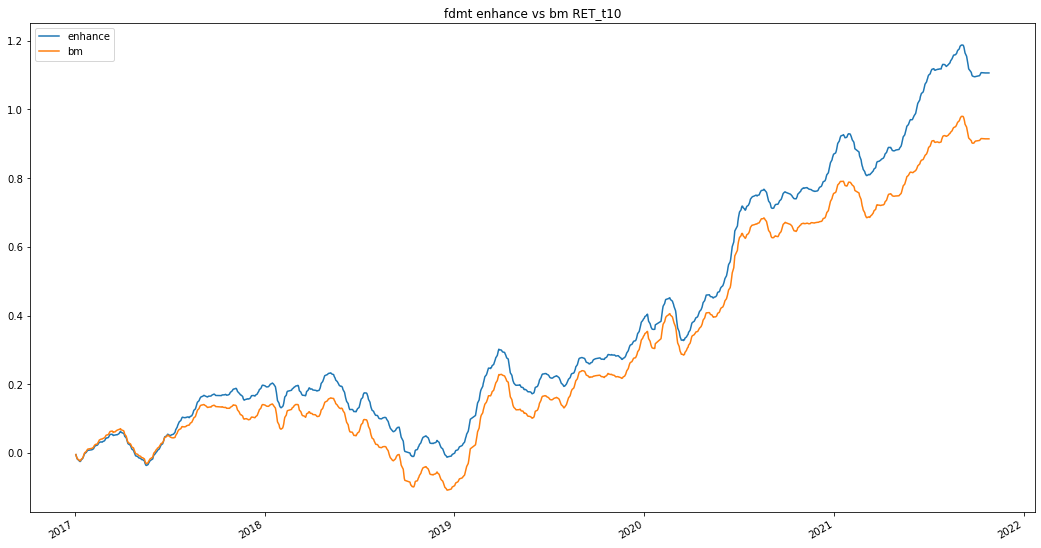

In [48]:
fdmt_compare_ret_t10_txfee = pd.concat([fdmt_enhance_ret_t10_txfee.rename("enhance"),fdmt_bm_ret_t10_txfee.rename("bm")],axis=1)
fdmt_compare_ret_t10_txfee.cumsum().plot(figsize=(18,10),title="fdmt enhance vs bm RET_t10")

<AxesSubplot:title={'center':'enhance excess bm RET_t10'}>

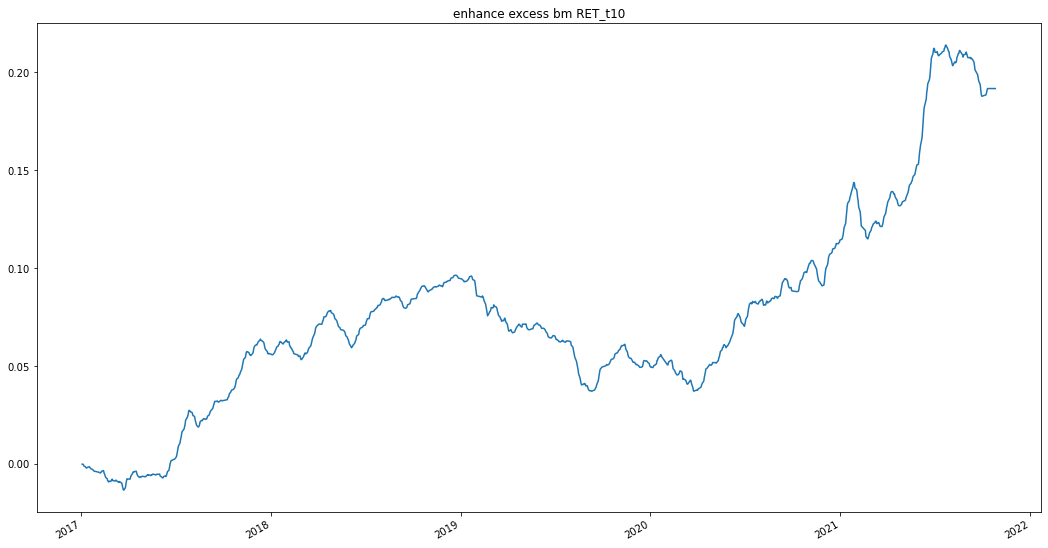

In [49]:
(fdmt_enhance_ret_t10_txfee-fdmt_bm_ret_t10_txfee).cumsum().plot(figsize=(18,10),title="enhance excess bm RET_t10")

### RET_t15 with txfee

In [71]:
fdmt_enhance_ret_t15_turnover,fdmt_enhance_ret_t15_txfee=cal_daily_return_txfee(fdmt_enhance_position,time_horizon_str="RET_t15")
fdmt_bm_ret_t15_turnover,fdmt_bm_ret_t15_txfee=cal_daily_return_txfee(fdmt_bm_position,time_horizon_str="RET_t15")
print("fdmt_enhance_ret_t15_turnover.describe():\n",fdmt_enhance_ret_t15_turnover.describe())
print("fdmt_bm_ret_t15_turnover.describe():\n",fdmt_bm_ret_t15_turnover.describe())

fdmt_enhance_ret_t15_turnover.describe():
 count    1169.000000
mean        1.377164
std         0.184990
min         0.000000
25%         1.281250
50%         1.388889
75%         1.493333
max         1.970149
dtype: float64
fdmt_bm_ret_t15_turnover.describe():
 count    1169.000000
mean        0.743788
std         0.229263
min         0.000000
25%         0.573913
50%         0.746154
75%         0.887892
max         1.361345
dtype: float64


<AxesSubplot:title={'center':'fdmt enhance vs bm RET_t15'}>

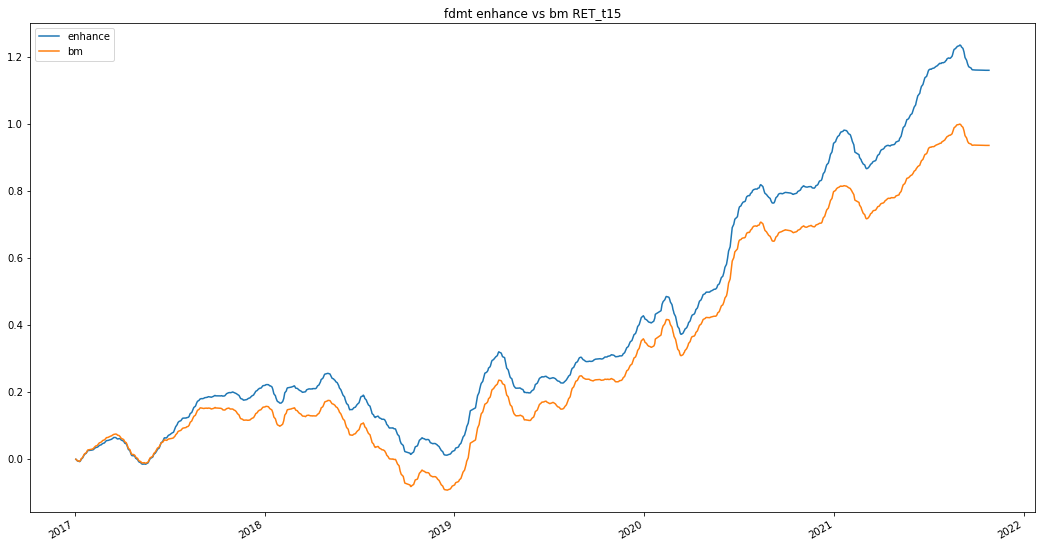

In [51]:
fdmt_compare_ret_t15_txfee = pd.concat([fdmt_enhance_ret_t15_txfee.rename("enhance"),fdmt_bm_ret_t15_txfee.rename("bm")],axis=1)
fdmt_compare_ret_t15_txfee.cumsum().plot(figsize=(18,10),title="fdmt enhance vs bm RET_t15")

<AxesSubplot:title={'center':'enhance excess bm RET_t15'}>

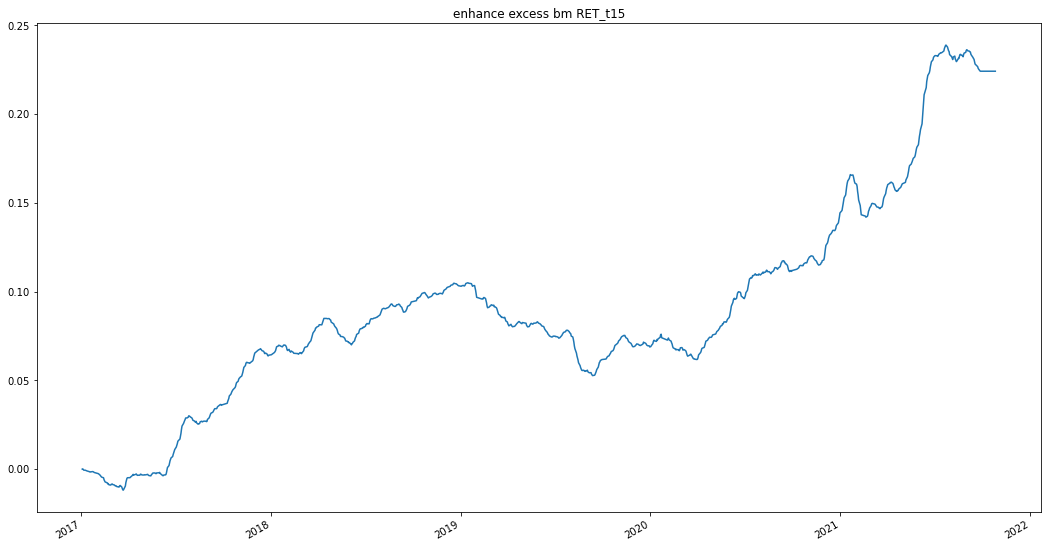

In [52]:
(fdmt_enhance_ret_t15_txfee-fdmt_bm_ret_t15_txfee).cumsum().plot(figsize=(18,10),title="enhance excess bm RET_t15")

### RET_t20 with txfee

In [72]:
fdmt_enhance_ret_t20_turnover,fdmt_enhance_ret_t20_txfee=cal_daily_return_txfee(fdmt_enhance_position,time_horizon_str="RET_t20")
fdmt_bm_ret_t20_turnover,fdmt_bm_ret_t20_txfee=cal_daily_return_txfee(fdmt_bm_position,time_horizon_str="RET_t20")
print("fdmt_enhance_ret_t20_turnover.describe():\n",fdmt_enhance_ret_t20_turnover.describe())
print("fdmt_bm_ret_t20_turnover.describe():\n",fdmt_bm_ret_t20_turnover.describe())

fdmt_enhance_ret_t20_turnover.describe():
 count    1169.000000
mean        1.516684
std         0.184445
min         0.000000
25%         1.441176
50%         1.544304
75%         1.625000
max         1.939394
dtype: float64
fdmt_bm_ret_t20_turnover.describe():
 count    1169.000000
mean        0.864661
std         0.230387
min         0.000000
25%         0.688259
50%         0.882129
75%         1.014778
max         1.389381
dtype: float64


<AxesSubplot:title={'center':'fdmt enhance vs bm RET_t20'}>

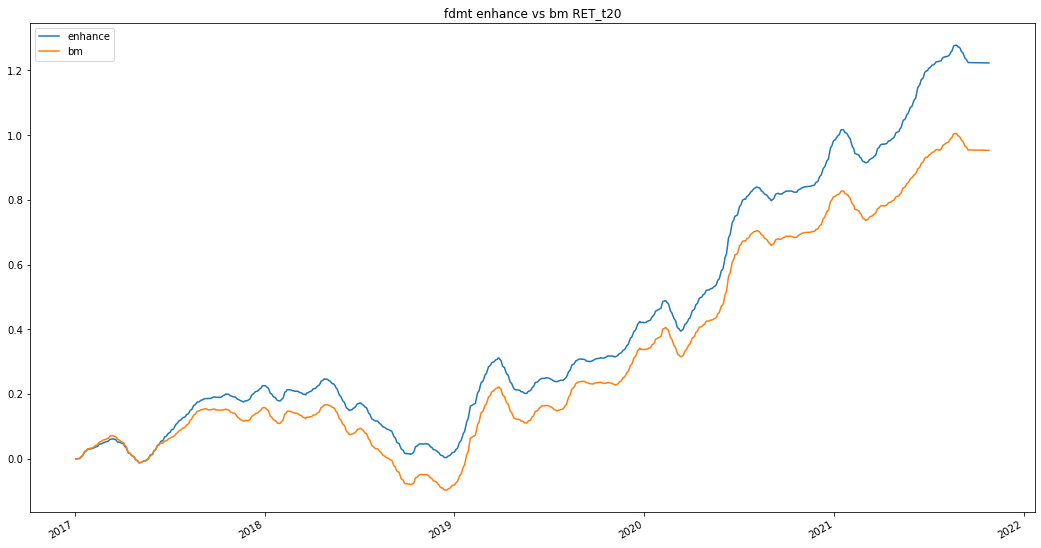

In [54]:
fdmt_compare_ret_t20_txfee = pd.concat([fdmt_enhance_ret_t20_txfee.rename("enhance"),fdmt_bm_ret_t20_txfee.rename("bm")],axis=1)
fdmt_compare_ret_t20_txfee.cumsum().plot(figsize=(18,10),title="fdmt enhance vs bm RET_t20")

<AxesSubplot:title={'center':'enhance excess bm RET_t20'}>

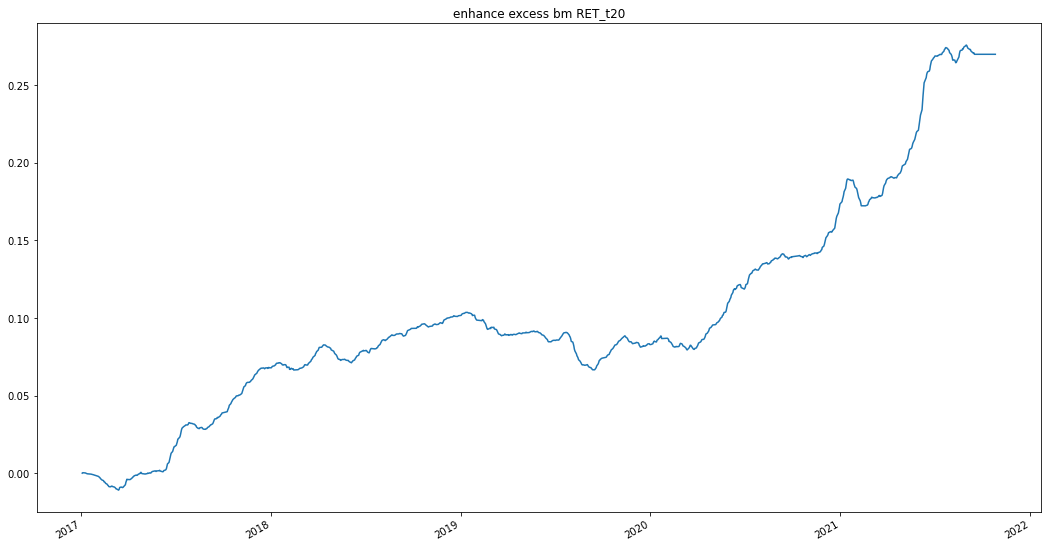

In [55]:
(fdmt_enhance_ret_t20_txfee-fdmt_bm_ret_t20_txfee).cumsum().plot(figsize=(18,10),title="enhance excess bm RET_t20")